In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [2]:
data = pd.read_excel('E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/ALL_Intersection.xlsx')

In [3]:
pop=['2000Pop','2001Pop','2002Pop','2003Pop','2004Pop','2005Pop','2006Pop','2007Pop','2008Pop','2009Pop',
     '2010Pop','2011Pop','2012Pop','2013Pop','2014Pop','2015Pop','2016Pop','2017Pop']
gdp=['2000GDP','2001GDP','2002GDP','2003GDP','2004GDP','2005GDP','2006GDP','2007GDP','2008GDP','2009GDP',
     '2010GDP','2011GDP','2012GDP','2013GDP','2014GDP','2015GDP','2016GDP','2017GDP']
area=['2000Area','2001Area','2002Area','2003Area','2004Area','2005Area','2006Area','2007Area','2008Area','2009Area',
     '2010Area','2011Area','2012Area','2013Area','2014Area','2015Area','2016Area','2017Area']
roadleng=['2000Roadleng','2001Roadleng','2002Roadleng','2003Roadleng','2004Roadleng','2005Roadleng','2006Roadleng','2007Roadleng','2008Roadleng','2009Roadleng',
     '2010Roadleng','2011Roadleng','2012Roadleng','2013Roadleng','2014Roadleng','2015Roadleng','2016Roadleng','2017Roadleng']
inv_times=['2000invtime','2001invtime','2002invtime','2003invtime','2004invtime','2005invtime','2006invtime','2007invtime','2008invtime','2009invtime',
     '2010invtime','2011invtime','2012invtime','2013invtime','2014invtime','2015invtime','2016invtime','2017invtime']
investment=['2000inv','2001inv','2002inv','2003inv','2004inv','2005inv','2006inv','2007inv','2008inv','2009inv',
     '2010inv','2011inv','2012inv','2013inv','2014inv','2015inv','2016inv','2017inv']
avgMoney=['2000avgInv','2001avgInv','2002avgInv','2003avgInv','2004avgInv','2005avgInv','2006avgInv','2007avgInv','2008avgInv','2009avgInv',
     '2010avgInv','2011avgInv','2012avgInv','2013avgInv','2014avgInv','2015avgInv','2016avgInv','2017avgInv']

In [4]:
### 获得双对数的值 ，舍掉双对数中的0值###
def get_log3(inv,g,DATA):
    ### + 1e-5解决RuntimeWarning: divide by zero encountered in log10 This is separate from the ipykernel package so we can avoid doing imports until
#     y_investment=np.log10(DATA[inv]+ 1e-5)
#     y_gdp=np.log10(DATA[g]+ 1e-5)
    y_investment=np.log10(DATA[inv])
    y_gdp=np.log10(DATA[g])
    y_investment2=y_investment.fillna(np.infty)
    y_gdp2=y_gdp.fillna(np.infty)
    x1=[]
    y1=[]
    for xi,yi in zip(y_investment2,y_gdp2):
        if xi==-float('Inf') or xi==float('Inf') or yi==-float('Inf') or yi==float('Inf'):
#             print('inf...')
            continue
#         elif xi>-4:
        else:
            x1.append(xi)
            y1.append(yi)
    return(x1,y1)

In [5]:
### 6.最小二乘拟合
from scipy.optimize import leastsq  ##引入最小二乘法算法
from sklearn.metrics import r2_score
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y
def pic6(yt,cname1,cname2,n2,num,num0,num3):
    yt1=yt[0]
    yt2=yt[1]
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点

    #读取结果
    k,b=Para[0]
    #print('最小二乘拟合模型的简单线性回归方程为y = {} * x + {}'.format(k, b))

    #画样本点
    #plt.figure(figsize=(10,6)) ##指定图像比例： 8：6
    font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
    plt.xlabel('$\log_{10} $'+' '+cname1,font2)
    plt.ylabel('$\log_{10} $'+' '+cname2+n2,font2)
    plt.tick_params(labelsize=16) #刻度字体大小13
    #plt.ylabel('$log_{10}$'+cname2)

    #画拟合直线
#     x=np.linspace(0,5) ##在0-15直接画100个连续点
#     y=k*x+b ##函数式
    y = [round(k*x+b,2) for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
#     print(k,b,yt1,y)
    #plt.plot(yt1,y,color="red",label='k={}'.format(k1),linewidth=2) 
    
#     plt.plot(yt1,y,label='β = {}'.format(k1),linewidth=2, color='darkblue')
    plt.plot(yt1,y,linewidth=2, color='darkblue')
    plt.scatter(yt1,yt2,linewidth=2 ,color='darkorange') #,label='$R^2$ = {}'.format(r2)
    plt.text(num0, num+num3, 'β = {}'.format("%.2f" % k),size=16)
    plt.text(num0, num, 'R'+r'$^2={}$'.format("%.2f" % r),size=16)
#     plt.legend()


D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


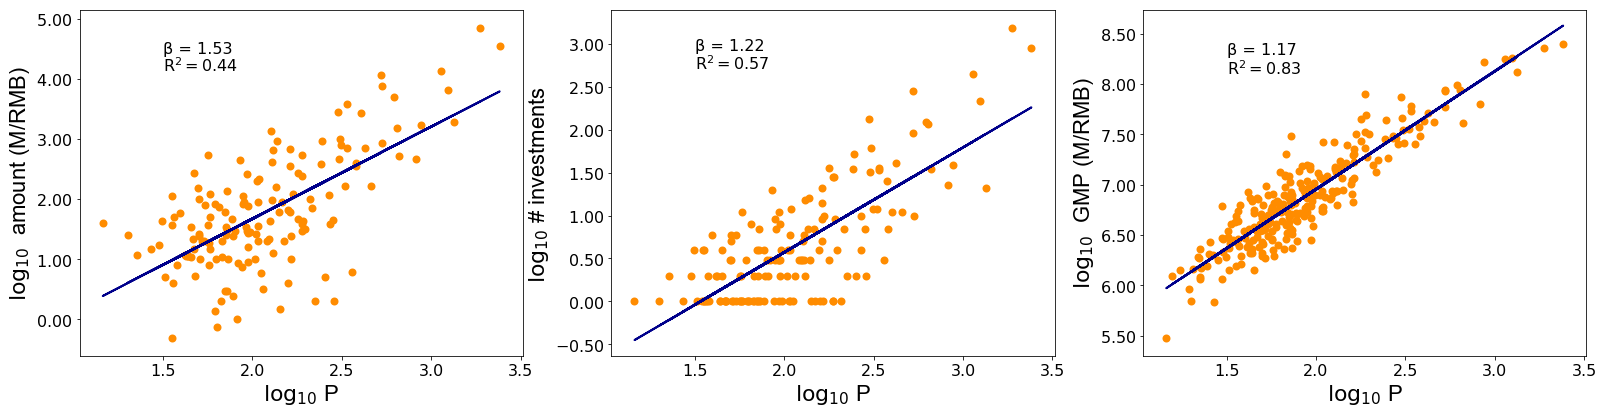

In [7]:
###人口 & others
### 2015年 
from matplotlib.ticker import FuncFormatter   ### 今天的主角
def formatnum(x, pos):
    return '$%.2f$' % x
fig = plt.figure(figsize=(27,14))
formatter = FuncFormatter(formatnum)
year=2015
i=year-2000
X11=pop[i]
cname11='P'

### pop&money
ax1 = fig.add_subplot(231)
ax1.yaxis.set_major_formatter(formatter)
X21=investment[i]
y1=get_log3(X11,X21,data)
np.shape(y1),np.shape(X11)
cname21=' amount '
# plt.subplot(231)
pic6(y1,cname11,cname21,'(M/RMB)',4.13,1.5,0.3)

### pop&GDP
ax3 = fig.add_subplot(233)
ax3.yaxis.set_major_formatter(formatter)
X22=gdp[i]
y2=get_log3(X11,X22,data)
np.shape(y2),np.shape(X11)
cname22=' GMP '
pic6(y2,cname11,cname22,'(M/RMB)',8.1,1.5,0.2)

### pop&invTimes
X25=inv_times[i]
y5=get_log3(X11,X25,data)
np.shape(y5),np.shape(X11)
cname25='# investments'
ax2 = fig.add_subplot(232)
ax2.yaxis.set_major_formatter(formatter)
pic6(y5,cname11,cname25,' ',2.7,1.5,0.23)
# plt.tight_layout()
plt.savefig('E:/文档系列/python 系列/picScalling/20201025NEW/Fig2_abc.pdf', bbox_inches='tight')#保存图片E:\文档系列\python 系列\picScalling\20201025NEW